In [1]:
import json 
import requests
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fp=open('movie_ids_01_10_2023.json',"r")

In [4]:
filename="newfile.csv"
csvfile=open(filename, 'w')


In [ ]:
count=0
j_string =fp.readline()


In [ ]:
dict1=json.loads(j_string)
movie_id=dict1["id"]
request_string=f"https://api.themoviedb.org/3/movie/{movie_id}?api_key=16d1245ee97a746fe03e21ef245eadb9&language=en-US&append_to_response=credits"


In [ ]:
ret=requests.get(request_string)
fields=["title","actors","actresses","writers","producers","directors","genres","editors","budget","revenue","runtime","popularity","avg_actor_popularity","avg_actress_popularity","release_date"]
j_ret=json.loads(ret.content)


In [ ]:
print(fields)
writer = csv.writer(csvfile) 
writer.writerow(fields) 


In [ ]:
while(count<20):
    j_string =fp.readline()
    dict1=json.loads(j_string)
    movie_id=dict1["id"]
    request_string=f"https://api.themoviedb.org/3/movie/{movie_id}?api_key=16d1245ee97a746fe03e21ef245eadb9&language=en-US&append_to_response=credits"
    ret=requests.get(request_string)
    j_ret=json.loads(ret.content)
    flag_cont=0
    for i in range(0,len(j_ret['production_countries'])):
        if(j_ret['production_countries'][i]['name']=='United Kingdom'or j_ret['production_countries'][i]['name']=='United States of America'):
            flag_cont=1
            print("yes")
        
    if(j_ret["original_language"]=='en' and flag_cont==1):
        print("hello")
        row_list=[]
        actor_list=[]
        actress_list=[]
        writer_list=[]
        director_list=[]
        producer_list=[]
        genres_list=[]
        editor_list=[]
        actor_popularity=0
        actress_popularity=0
        row_list.append(j_ret['title'])
        
        for i in range(0,len(j_ret['credits']['cast'])):
            if(j_ret['credits']['cast'][i]['gender']==1):
                actress_list.append(j_ret['credits']['cast'][i]['name'])
                actress_popularity=actress_popularity+j_ret['credits']['cast'][i]['popularity']
            else:
                actor_list.append(j_ret['credits']['cast'][i]['name'])
                actor_popularity=actor_popularity+j_ret['credits']['cast'][i]['popularity']
        row_list.append(actor_list)
        row_list.append(actress_list)
        
        
        
        for i in range(0,len(j_ret['credits']['crew'])):
            if(j_ret['credits']['crew'][i]['job']=="Author"):
                writer_list.append(j_ret['credits']['crew'][i]['name'])
            if(j_ret['credits']['crew'][i]['job']=="Director"):
                director_list.append(j_ret['credits']['crew'][i]['name'])
            if(j_ret['credits']['crew'][i]['job']=="Producer"):
                producer_list.append(j_ret['credits']['crew'][i]['name'])
            if(j_ret['credits']['crew'][i]['job']=="Editor"):
                editor_list.append(j_ret['credits']['crew'][i]['name'])
            
        for i in range(0,len(j_ret["genres"])):
            genres_list.append(j_ret["genres"][i]["name"])
        row_list.append(writer_list)
        row_list.append(producer_list)
        row_list.append(director_list)
        row_list.append(genres_list)
        row_list.append(editor_list)
        row_list.append(j_ret["budget"])
        row_list.append(j_ret["revenue"])
        row_list.append(j_ret["runtime"])
        row_list.append(j_ret["popularity"])
        if(len(actor_list)!=0):
            row_list.append(actor_popularity/len(actor_list))
        else:
            row_list.append(0)
        if(len(actress_list)!=0):
            row_list.append(actress_popularity/len(actress_list))
        else:
            row_list.append(0)
        row_list.append(j_ret["release_date"])
        writer.writerow(row_list)
        print(row_list)
    count=count+1

In [5]:
# start running the project from here if you have the data3.csv

inflation = pd.read_excel('inflation_rates.xlsx',index_col=0)
print(inflation.head())

inflation.rename(columns={'Jan':'1'},inplace=True)
inflation.rename(columns={'Feb':'2'},inplace=True)
inflation.rename(columns={'Mar':'3'},inplace=True)
inflation.rename(columns={'Apr':'4'},inplace=True)
inflation.rename(columns={'May':'5'},inplace=True)
inflation.rename(columns={'Jun':'6'},inplace=True)
inflation.rename(columns={'Jul':'7'},inplace=True)
inflation.rename(columns={'Aug':'8'},inplace=True)
inflation.rename(columns={'Sep':'9'},inplace=True)
inflation.rename(columns={'Oct':'10'},inplace=True)
inflation.rename(columns={'Nov':'11'},inplace=True)
inflation.rename(columns={'Dec':'12'},inplace=True)

inflation.drop(inflation.iloc[:, 12:14], inplace=True, axis=1)
print(inflation.head())


       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  \
Year                                                                           
1913   9.8   9.8   9.8   9.8   9.7   9.8   9.9   9.9  10.0  10.0  10.1  10.0   
1914  10.0   9.9   9.9   9.8   9.9   9.9  10.0  10.2  10.2  10.1  10.2  10.1   
1915  10.1  10.0   9.9  10.0  10.1  10.1  10.1  10.1  10.1  10.2  10.3  10.3   
1916  10.4  10.4  10.5  10.6  10.7  10.8  10.8  10.9  11.1  11.3  11.5  11.6   
1917  11.7  12.0  12.0  12.6  12.8  13.0  12.8  13.0  13.3  13.5  13.5  13.7   

      HALF1  HALF2  
Year                
1913    NaN    NaN  
1914    NaN    NaN  
1915    NaN    NaN  
1916    NaN    NaN  
1917    NaN    NaN  
         1     2     3     4     5     6     7     8     9    10    11    12
Year                                                                        
1913   9.8   9.8   9.8   9.8   9.7   9.8   9.9   9.9  10.0  10.0  10.1  10.0
1914  10.0   9.9   9.9   9.8   9.9   9.9  10.0  10.2  10.2  1

In [6]:
"""
Data PreProcessing-
1- Removed nan and zero values rows from the dataframe (cleaning)
2- inflation rates for budget and box-office (Normalization / scaling)
3- Data encoding (holiday dates ko 2 score dena while non holiday dates ko 1)
4- Discretization (maybe dekhte hai kaha kar sakte hai)
5- Feature Selection done in which 6 features are taken, bas uska justification dena hai

6,7 - maybe wont do
6- Feature engineering: This involves creating new features from the existing ones to improve the performance of machine learning models.
7- Data augmentation: This involves generating additional training data by applying various transformations to the existing data.

Sara preprocessed data is in the lists made by to_list() jiska baad me naya dataframe banana hai.
"""

'\nData PreProcessing-\n1- Removed nan and zero values rows from the dataframe (cleaning)\n2- inflation rates for budget and box-office (Normalization / scaling)\n3- Data encoding (holiday dates ko 2 score dena while non holiday dates ko 1)\n4- Discretization (maybe dekhte hai kaha kar sakte hai)\n5- Feature Selection done in which 6 features are taken, bas uska justification dena hai\n\n6,7 - maybe wont do\n6- Feature engineering: This involves creating new features from the existing ones to improve the performance of machine learning models.\n7- Data augmentation: This involves generating additional training data by applying various transformations to the existing data.\n\nSara preprocessed data is in the lists made by to_list() jiska baad me naya dataframe banana hai.\n'

In [7]:
# data3.csv is the one in which all data is present

var = pd.read_csv("data3.csv")
# 1) Data cleaning
var.dropna(inplace=True)
var = var.drop(var[var['revenue']==0].index)
var = var.drop(var[var['budget']==0].index)
var = var.drop(var[var['runtime']<80].index)

""" fields = [title, actors, actresses, writers, producers, directors, genres, editors, budget, 
              revenue, runtime, popularity, avg_actor_popularity, avg_actress_popularity, release_date]

important = [directors + genres + budget + runtime + popularity + avg_actor_popularity + avg_actress_popularity + release_date --> revenue]
"""
print()

In [8]:
# converting columns to lists

directors = var['directors'].to_list()
genres = var['genres'].tolist()
bud = var['budget'].tolist()
runtime = var['runtime'].to_list()
popularity = var['popularity'].tolist()
actor_rating = var['avg_actor_popularity'].tolist()
actress_rating = var['avg_actress_popularity'].tolist()
release_date = var['release_date'].tolist()

box = var['revenue'].tolist()

# run one time only to adjust the budget and boc-office in 'var' dataframe
# 2) Normalization 
for i in range(len(release_date)):
    year = int(release_date[i][0:4])
    month = int(release_date[i][5:7])
    bud[i] /= inflation.iloc[(year-1913):(year-1912)][str(month)]
    box[i] /= inflation.iloc[(year-1913):(year-1912)][str(month)]

box_office = []
budget = []
for i in range(len(box)):
    year = int(release_date[i][0:4])
    box_office.append(box[i].at[year])
    budget.append(bud[i].at[year])
Genre_lst = []
for g in genres:
    Genre_lst.append(g.count(',')+1)

In [9]:
# 3) categorization - conversion of dates to numbers according to holidays

# !pip install holidays
from datetime import date,datetime
import holidays

India_holidays = holidays.IN()
UK_holidays = holidays.UnitedKingdom()
US_holidays = holidays.US()
China_holidays = holidays.China()
holidates = India_holidays + UK_holidays + US_holidays + China_holidays

def is_valid_date(date_string):
    try:
        datetime.strptime(date_string, '%Y-%m-%d')
        return True
    except ValueError:
        return False

for i in range(len(release_date)):
    t = release_date[i][5:10]
    next_date = t[0:3]+str(int(t[3:5])+1)
    prev_date = t[0:3]+str(int(t[3:5])-1)
    try:
        if(t in holidates):
            release_date[i] = 2
        elif (is_valid_date(release_date[i][0:5]+prev_date) and prev_date in holidates):
            release_date[i] = 1.5
        elif(is_valid_date(release_date[i][0:5]+next_date) and next_date in holidates):
            release_date[i] = 1.5
        else:
            release_date[i] = 1
    except:
        release_date[i] = 1
print(release_date)

[1, 1, 1, 1.5, 1.5, 1, 1, 1.5, 1.5, 1, 1.5, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1.5, 1, 2, 1, 1.5, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1.5, 1.5, 1, 1, 2, 1, 1, 1.5, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1.5, 1.5, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1.5, 1, 1, 1.5, 1, 1.5, 1, 1, 2, 1, 1, 1, 1.5, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1.5, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1.5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1.5, 2, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 2, 1, 1, 1, 1.5, 2, 2, 1.5, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 2, 2, 1.5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [10]:
# Again Categorization

st = set()
for i in range(len(genres)):
    genres[i] = eval(genres[i])
    for j in genres[i]:
        st.add(j)

print("Originally present genres are",st)
# important genres are - action, adventure, comedy, drama, fantasy, horror, musicals, mystery, romance, science fiction, sports, thriller, and Western
# hence removing other genres

st.remove('Animation')
st.remove('Documentary')
st.remove('Family')
st.remove('Fantasy')
st.remove('History')
st.remove('TV Movie')
st=list(st)

print("After removing non-requiring genres",st)
# now giving points on basis of genres

for i in range(len(genres)):
    score=0
    for gen in genres[i]:
        if(gen in st):
            score +=1
    genres[i] = score
print(genres)

Originally present genres are {'Crime', 'Drama', 'Adventure', 'Mystery', 'Romance', 'Science Fiction', 'Animation', 'Music', 'Fantasy', 'War', 'Thriller', 'Action', 'Family', 'Horror', 'History', 'Comedy', 'Western', 'Documentary', 'TV Movie'}
After removing non-requiring genres ['Crime', 'Drama', 'Adventure', 'Mystery', 'Romance', 'Science Fiction', 'Music', 'War', 'Thriller', 'Action', 'Horror', 'Comedy', 'Western']
[2, 3, 3, 0, 3, 1, 2, 2, 4, 2, 2, 2, 2, 1, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 4, 4, 3, 3, 3, 2, 3, 2, 3, 4, 2, 3, 2, 2, 4, 3, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 5, 3, 3, 4, 4, 4, 2, 2, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 3, 2, 1, 2, 4, 4, 3, 3, 2, 4, 3, 3, 4, 3, 3, 2, 4, 4, 4, 2, 2, 1, 2, 3, 1, 2, 3, 1, 4, 2, 2, 2, 3, 2, 4, 2, 4, 2, 3, 3, 4, 2, 3, 2, 2, 4, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 4, 3, 2, 2, 1, 2, 4, 0, 2, 1, 2, 3, 2, 2, 2, 3, 3, 4, 1, 2, 2, 3, 2, 3, 3, 4, 4, 3, 2, 3, 4, 1, 2, 2, 3, 2, 3, 1, 1, 2, 3, 1, 5, 3, 1, 3, 3, 4, 1, 2

In [11]:
# removing the outliers of box-office
q1 = np.percentile(box_office, 25)
q3 = np.percentile(box_office, 75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

#using scatter plot to better understand relations of box-office and other parameters
budge=[]
acto=[]
acte=[]
releaseD=[]
gen=[]
runt=[]
popu=[]
boxe=[]
for i in range(len(box_office)):
    if(box_office[i] > lower_bound and box_office[i] < upper_bound and popularity[i]<125):
        budge.append(budget[i])
        acto.append(actor_rating[i])
        acte.append(actress_rating[i])
        releaseD.append(release_date[i])
        gen.append(genres[i])
        runt.append(runtime[i])
        popu.append(popularity[i])
        boxe.append(box_office[i])

In [12]:
print(len(budget))

budget=budge
actor_rating=acto
actress_rating=acte
release_date=releaseD
genres=gen
runtime = runt
popularity =popu
box_office=boxe

len(release_date)

3426


3112

In [13]:

"""
Exploratory Data Analysis-
1- covariance matrix made
2- 
3- 
4- 
Yaha graphs banao jitne bhi related hai
We have 6 features = []
Sara preprocessed data is in the lists made by to_list() jiska baad me naya dataframe banana hai.
"""

'\nExploratory Data Analysis-\n1- covariance matrix made\n2- \n3- \n4- \nYaha graphs banao jitne bhi related hai\nWe have 6 features = []\nSara preprocessed data is in the lists made by to_list() jiska baad me naya dataframe banana hai.\n'

In [14]:

# convering lists to dataframe

data = list(zip(directors, genres, budget, runtime , popularity ,actor_rating, actress_rating, release_date, box_office))
df = pd.DataFrame(data, columns=['directors', 'genres', 'budget', 'runtime' , 'popularity' ,'actor_rating', 'actress_rating', 'release_date', 'box_office'])

df

,directors,genres,budget,runtime,popularity,actor_rating,actress_rating,release_date,box_office
0,"['Allison Anders', 'Alexandre Rockwell', 'Robe...",2,26058.631922,98,18.874,17.668000,14.075467,1.0,2.773521e+04
1,['Stephen Hopkins'],3,144131.777625,109,7.730,9.758583,5.515667,1.0,8.330088e+04
2,['George Lucas'],2,58722.167832,119,19.211,1.378800,2.086000,1.0,1.623636e+06
3,['Andrew Stanton'],2,74245.939675,141,14.029,7.653304,9.621667,1.5,2.322035e+05
4,['Robert Zemeckis'],2,162162.162162,111,41.756,7.050708,12.422769,1.5,9.778707e+05
...,...,...,...,...,...,...,...,...,...
3107,['Dick Lowry'],3,2268.431002,90,4.623,2.081444,4.113333,1.0,2.268431e+05
3108,['Robert Wise'],2,68746.694870,96,6.087,3.973476,7.468600,1.0,3.038985e+03
3109,['Jeff Franklin'],1,3838.280450,98,5.547,5.087750,1.470250,2.0,2.047083e+04
3110,['Richard Greenberg'],2,31460.674157,88,19.855,1.836643,2.546800,1.0,4.370972e+04


In [15]:
df.describe()   # examining the cleaned data

,genres,budget,runtime,popularity,actor_rating,actress_rating,release_date,box_office
count,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03
mean,2.383033,1.660068e+05,108.403599,15.882635,6.190941,8.123062,1.203246,3.693407e+05
std,1.009346,1.470462e+05,19.273139,10.492442,3.404722,5.101155,0.356190,3.752801e+05
min,0.000000,2.399785e-02,80.000000,0.600000,0.600000,0.000000,1.000000,4.799570e-03
25%,2.000000,6.035784e+04,95.000000,9.591250,3.710906,4.681961,1.000000,8.823892e+04
50%,2.000000,1.231393e+05,104.000000,12.788000,5.502324,7.204626,1.000000,2.345724e+05
75%,3.000000,2.288866e+05,118.000000,18.561250,8.004375,10.357036,1.500000,5.258296e+05
max,6.000000,1.022864e+06,254.000000,107.320000,31.171600,45.303000,2.000000,1.626356e+06


In [16]:

new_mat = [actor_rating, actress_rating, budget, popularity, genres, release_date, box_office]

cov_matrix = np.cov(new_mat, bias=True)
for _ in cov_matrix:
  for i in _:
    print(i,end="  ")
  print()

11.58840473785119  6.84091791965386  85490.6610166207  2.0792749901169856  0.339245950105041  0.01643795307800515  -14908.416990013973  
6.84091791965386  26.013419155659196  84212.65913921884  4.741448584063088  0.34343996842194036  -0.042315506913338324  -29717.436180219134  
85490.6610166207  84212.65913921884  21615624965.737194  393289.26272936404  24615.662798898295  245.72685084057923  26984910820.0808  
2.0792749901169856  4.741448584063088  393289.26272936404  110.05596437188822  -0.3732380700629786  0.03942268216242295  1654869.7244183407  
0.339245950105041  0.34343996842194036  24615.662798898295  -0.3732380700629786  1.0184524950271299  -0.009405089181276912  22864.01152661723  
0.01643795307800515  -0.042315506913338324  245.72685084057923  0.03942268216242295  -0.009405089181276912  0.12683072636150983  785.1313921459646  
-14908.416990013973  -29717.436180219134  26984910820.0808  1654869.7244183407  22864.01152661723  785.1313921459646  140789917604.70605  


In [17]:
df['budget'][0] # 4000000 -> 26058.631921824104

26058.631921824104

In [18]:
"""
1) Explore the distribution of the revenue variable: Start by plotting the distribution of the revenue variable to see how it's distributed across the dataset. A histogram or density plot can be useful for this, as well as summary statistics like mean, median, and standard deviation.

2) Examine relationships between revenue and other variables: Look for correlations between the revenue variable and other variables in the dataset. For example, you might expect that higher production budgets, bigger marketing budgets, and more experienced directors are associated with higher revenue. You can use scatterplots or correlation matrices to explore these relationships.

3) Create new features from existing ones: Sometimes, creating new features from existing ones can be helpful       in predicting the target variable. For example, you might create a feature that represents the total number of social media followers for the actors and director of a movie.

4) Identify potential outliers and anomalies: Look for potential outliers and anomalies in the data that may affect the predictive power of the model. These can be identified using scatterplots and other visualization tools.

5) Visualize the distribution of categorical variables: If the dataset contains categorical variables, you can create bar plots or pie charts to explore their distribution and identify potential relationships with the revenue variable.

6) Analyze the impact of release timing: Explore how release date, release day of the week, and release month impact revenue. You can create time series plots to visualize how revenue has changed over time.

7) Assess the impact of genres: Explore how the genre of a movie impacts revenue. You can create bar plots to visualize the average revenue of movies in different genres.
"""

"\n1) Explore the distribution of the revenue variable: Start by plotting the distribution of the revenue variable to see how it's distributed across the dataset. A histogram or density plot can be useful for this, as well as summary statistics like mean, median, and standard deviation.\n\n2) Examine relationships between revenue and other variables: Look for correlations between the revenue variable and other variables in the dataset. For example, you might expect that higher production budgets, bigger marketing budgets, and more experienced directors are associated with higher revenue. You can use scatterplots or correlation matrices to explore these relationships.\n\n3) Create new features from existing ones: Sometimes, creating new features from existing ones can be helpful       in predicting the target variable. For example, you might create a feature that represents the total number of social media followers for the actors and director of a movie.\n\n4) Identify potential outlie

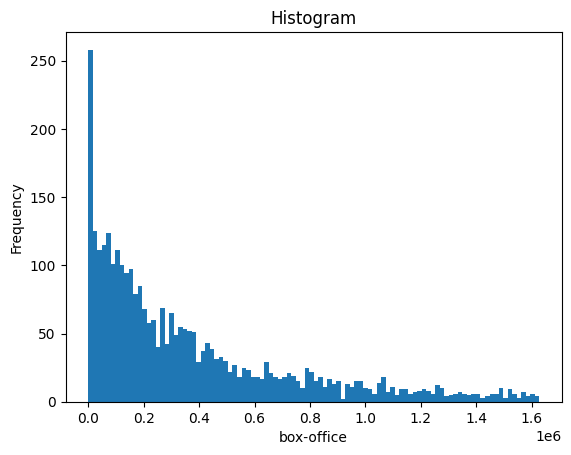

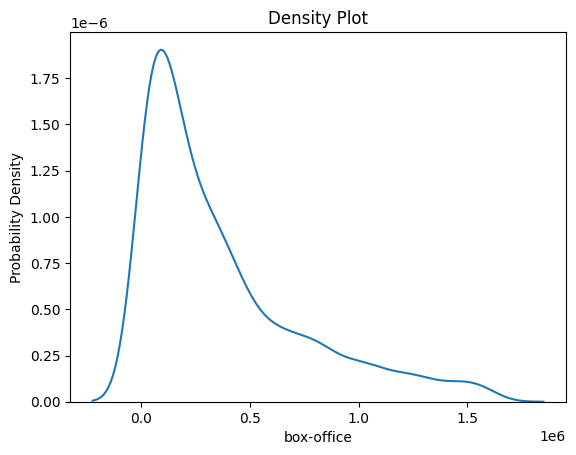

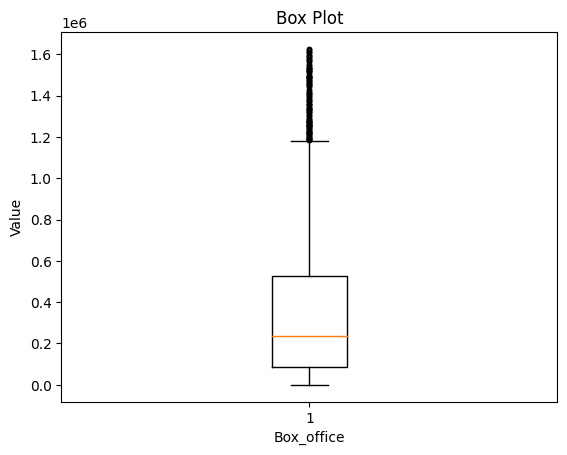

In [19]:
# how is box_office distributes in the dataset

plt.hist(boxe, bins=100)
plt.xlabel('box-office')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

sns.kdeplot(boxe)
plt.xlabel('box-office')
plt.ylabel('Probability Density')
plt.title('Density Plot')
plt.show()

plt.boxplot(boxe, flierprops={'markersize': 3})

# set title and labels
plt.title("Box Plot")
plt.xlabel("Box_office")
plt.ylabel("Value")

# show plot
plt.show()
# here we get the idea of how most movies box-office is distributed in the left

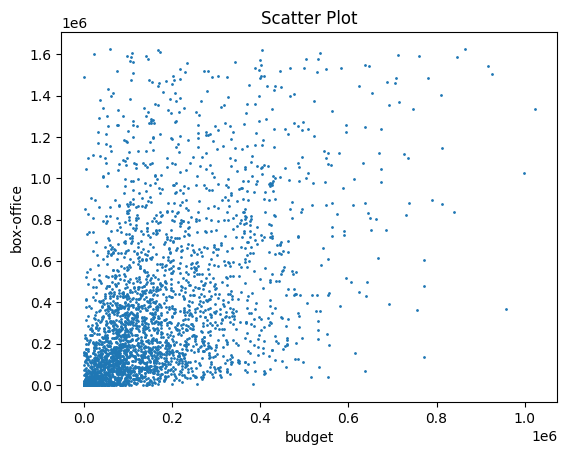

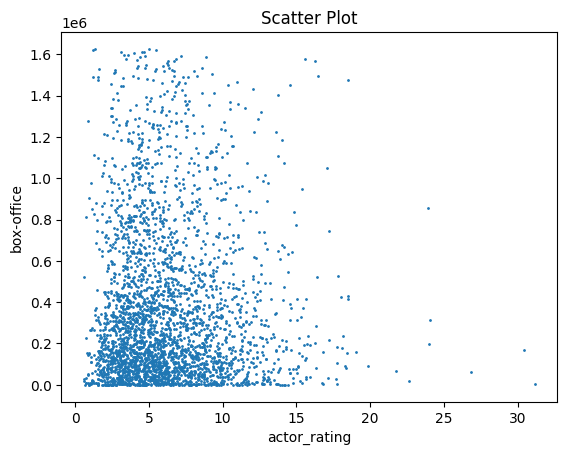

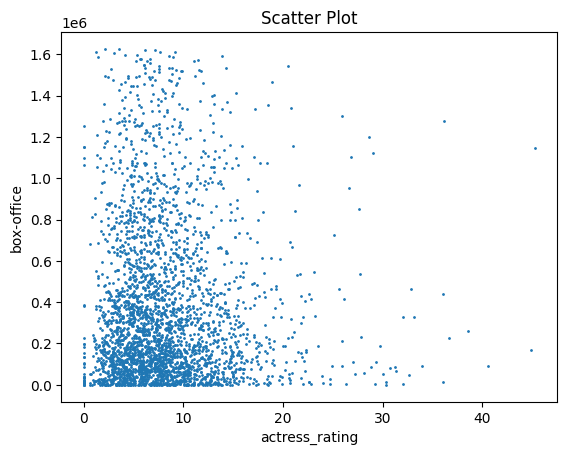

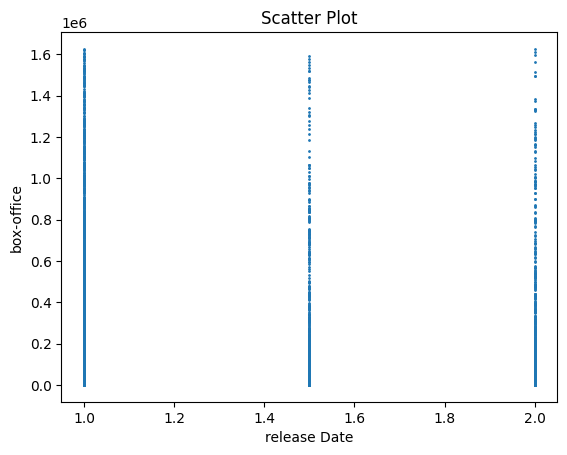

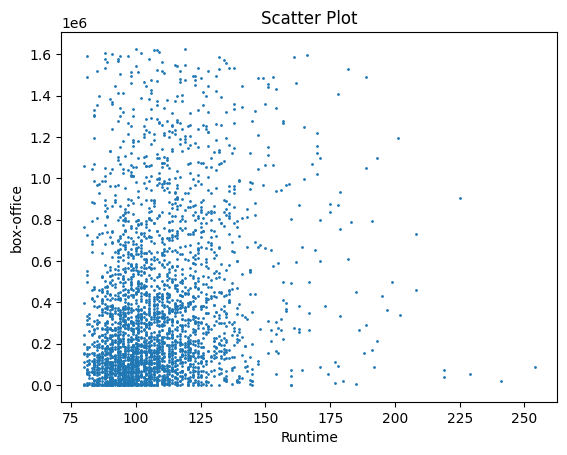

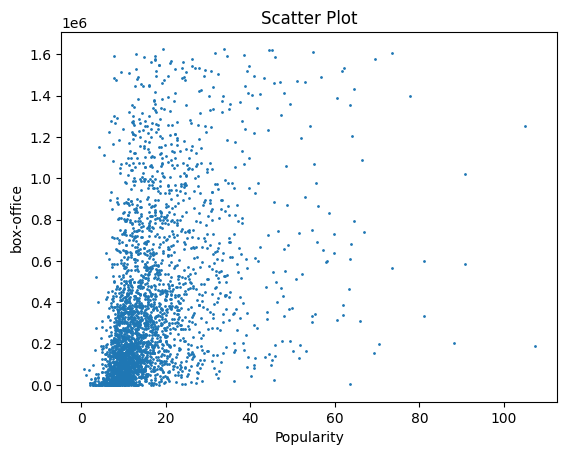

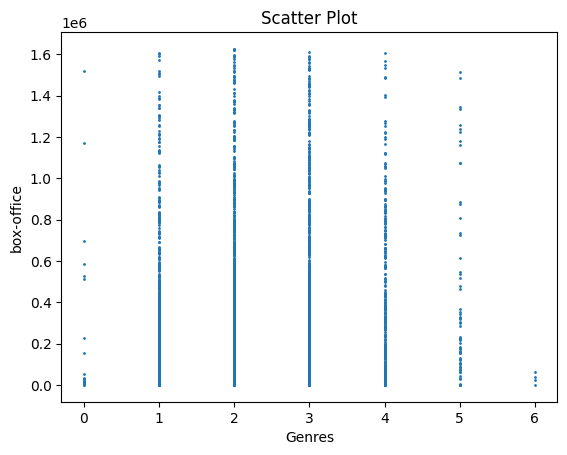

In [20]:

# boxe = [i for i in box_office if i < upper_bound and i>lower_bound]
plt.scatter(budge, boxe, s=1)
plt.xlabel('budget')
plt.ylabel('box-office')
plt.title('Scatter Plot')
plt.show()

plt.scatter(acto, boxe, s=1)
plt.xlabel('actor_rating')
plt.ylabel('box-office')
plt.title('Scatter Plot')
plt.show()

plt.scatter(acte, boxe, s=1)
plt.xlabel('actress_rating')
plt.ylabel('box-office')
plt.title('Scatter Plot')
plt.show()

plt.scatter(releaseD, boxe, s=1)
plt.xlabel('release Date')
plt.ylabel('box-office')
plt.title('Scatter Plot')
plt.show()

plt.scatter(runt, boxe, s=1)
plt.xlabel('Runtime')
plt.ylabel('box-office')
plt.title('Scatter Plot')
plt.show()

plt.scatter(popu, boxe, s=1)
plt.xlabel('Popularity')
plt.ylabel('box-office')
plt.title('Scatter Plot')
plt.show()

plt.scatter(gen, boxe, s=1)
plt.xlabel('Genres')
plt.ylabel('box-office')
plt.title('Scatter Plot')
plt.show()

In [21]:
mean_box_office = df["box_office"].mean()
std_box_office = df["box_office"].std()

# define function to assign points to each genre based on box office collections
def assign_points_by_box_office(df):
    points = []
    for genre in df["genres"].unique():
        genre_df = df[df["genres"] == genre]
        if genre_df.empty:
            points.append(1) # assign 1 point if genre has no movies in the dataset
        else:
            genre_box_office = genre_df["box_office"].mean()
            if genre_box_office > mean_box_office + std_box_office:
                points.append(5)
            elif genre_box_office > mean_box_office:
                points.append(4)
            elif genre_box_office > mean_box_office - std_box_office:
                points.append(3)
            else:
                points.append(2)
    return points

# call function to assign points to each genre based on box office collections


In [32]:
"""
Model building begins
1) Decision tree regressor
2) Linear Regressor    
"""

from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.linear_model import LinearRegression as LnR
from sklearn.ensemble import RandomForestRegressor as RFR

In [33]:
df.columns

Index(['directors', 'genres', 'budget', 'runtime', 'popularity',
       'actor_rating', 'actress_rating', 'release_date', 'box_office'],
      dtype='object')

In [34]:
train1_features = ['directors', 'genres', 'budget', 'runtime', 'popularity', 'avg_actor_popularity', 'avg_actress_popularity', 'release_date']
test1_features = ['directors', 'genres', 'budget', 'runtime', 'popularity', 'avg_actor_popularity', 'avg_actress_popularity', 'release_date']

In [68]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop("box_office", axis = 1).values
y = df["box_office"].values

X = np.delete(X, 0, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2956, 7)
X_test (156, 7)
y_train (2956,)
y_test (156,)


In [69]:
# x_train_max = np.max(X_train)
# x_train_min = np.min(X_train)
# X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
# X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

In [70]:
print(X_train[0])
print(X[0])

"""array([1.001875e-06, 0.0016838235294117647, 8.9166875e-05,
       1.3592438125e-05, 1.6055380833333338e-06, 5.073161041666667e-06,
       1.001875e-06], dtype=object)"""

[3 19425.0 86 11.408 2.410649999999997 2.90725 1.0]
[2 26058.631921824104 98 18.874 17.668 14.075466666666667 1.0]


'array([1.001875e-06, 0.0016838235294117647, 8.9166875e-05,\n       1.3592438125e-05, 1.6055380833333338e-06, 5.073161041666667e-06,\n       1.001875e-06], dtype=object)'

In [71]:
models = [("DTR", DTR()),
          ("LR",LnR()),
          ("RFR",RFR()),
          ]

In [72]:
finalResults = []
# cmList = []

for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    # score = precision_score(y_test, model_result)
    # cm = confusion_matrix(y_test, model_result)
    
    finalResults.append(model_result)
    # cmList.append((name, cm))

In [73]:
mse = mean_squared_error(y_test,finalResults[0])
r2 = r2_score(y_test,finalResults[0])
#for linear regressor
print("\nlinear regressor")
print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)

mse = mean_squared_error(y_test,finalResults[1])
r2 = r2_score(y_test,finalResults[1])

#for decision tree regressor

print("\ndecision tree regressor")
print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)

mse = mean_squared_error(y_test,finalResults[2])
r2 = r2_score(y_test,finalResults[2])

#for random forests regressor
print("\nrandom forests regressor")
print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)




linear regressor
Mean Squared Error: 186243555536.82605
R-Squared Score: -0.17462668562445693

decision tree regressor
Mean Squared Error: 90157378118.50552
R-Squared Score: 0.431382944023579

random forests regressor
Mean Squared Error: 90481176345.08057
R-Squared Score: 0.4293407684616025
